In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Test Notebook")


Test Notebook


### I. Analyse descriptive de la base de données

#####    **1. Analyse globale de la base de données**

In [165]:
#Colonnes séparées par des espaces et sans nom de colonnes (les noms sont dans le fichier .info)
df = pd.read_csv('../data/welddb.data', delim_whitespace=True, header=None)

#On nomme les colonnes 
column_names = [
    "Carbon", "Silicon", "Manganese", "Sulphur", "Phosphorus", "Nickel", "Chromium", "Molybdenum",
    "Vanadium", "Copper", "Cobalt", "Tungsten", "Oxygen", "Titanium", "Nitrogen", "Aluminium",
    "Boron", "Niobium", "Tin", "Arsenic", "Antimony", "Current", "Voltage", "AC_or_DC",
    "Electrode_polarity", "Heat_input", "Interpass_temp", "Weld_type", "Post_weld_HT_temp",
    "Post_weld_HT_time", "Yield_strength", "Ultimate_tensile_strength", "Elongation",
    "Reduction_of_area", "Charpy_temp", "Charpy_toughness", "Hardness", "FATT_50",
    "Primary_ferrite", "Ferrite_second_phase", "Acicular_ferrite", "Martensite",
    "Ferrite_carbide", "Weld_ID"
]

df.columns = column_names 
print(df.head())

# Dimensions du dataset
print("Shape du dataset :", df.shape)


   Carbon  Silicon  Manganese Sulphur Phosphorus Nickel Chromium Molybdenum  \
0   0.037     0.30       0.65   0.008      0.012      0        N          N   
1   0.037     0.30       0.65   0.008      0.012      0        N          N   
2   0.037     0.30       0.65   0.008      0.012      0        N          N   
3   0.037     0.31       1.03   0.007      0.014      0        N          N   
4   0.037     0.31       1.03   0.007      0.014      0        N          N   

  Vanadium Copper  ... Charpy_temp Charpy_toughness Hardness FATT_50  \
0        N      N  ...           N                N        N       N   
1        N      N  ...         -28              100        N       N   
2        N      N  ...         -38              100        N       N   
3        N      N  ...           N                N        N       N   
4        N      N  ...         -48              100        N       N   

  Primary_ferrite Ferrite_second_phase Acicular_ferrite Martensite  \
0               N     

*Analyse des dimensions (suite au .shape)*

On a un fichier de 1652 lignes et 44 colonnes donc 1000 observations et 44 variables. On a un nombre d'observations bien supérieur au nombre de variables, le dataset est de bonne taille pour un projet de ML.

In [166]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Carbon                     1652 non-null   float64
 1   Silicon                    1652 non-null   float64
 2   Manganese                  1652 non-null   float64
 3   Sulphur                    1652 non-null   object 
 4   Phosphorus                 1652 non-null   object 
 5   Nickel                     1652 non-null   object 
 6   Chromium                   1652 non-null   object 
 7   Molybdenum                 1652 non-null   object 
 8   Vanadium                   1652 non-null   object 
 9   Copper                     1652 non-null   object 
 10  Cobalt                     1652 non-null   object 
 11  Tungsten                   1652 non-null   object 
 12  Oxygen                     1652 non-null   object 
 13  Titanium                   1652 non-null   objec

*Analyse des valeurs manquantes et types (suite au .info())*

Les valeurs manquantes sont codées 'N', Pandas ne les reconnait pas. 

On remplace donc les 'N' pas des 'NaN'. 
On met le type "float64" aux colonnes qui ne contiennent pas de texte. 

In [167]:

#Nouveau dataframe pour les transfomations
df_transfo=df.copy()

#On remplace les 'N' par des 'NaN'
df_transfo.replace("N", np.nan, inplace=True)

#On met les types de colonne en float si elles ne contiennent pas de texte 
for col in df_transfo.columns:
    df_transfo[col] = pd.to_numeric(df_transfo[col], errors='ignore')

print(df_transfo.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Carbon                     1652 non-null   float64
 1   Silicon                    1652 non-null   float64
 2   Manganese                  1652 non-null   float64
 3   Sulphur                    1648 non-null   object 
 4   Phosphorus                 1642 non-null   float64
 5   Nickel                     697 non-null    float64
 6   Chromium                   784 non-null    float64
 7   Molybdenum                 793 non-null    object 
 8   Vanadium                   928 non-null    object 
 9   Copper                     578 non-null    object 
 10  Cobalt                     129 non-null    object 
 11  Tungsten                   75 non-null     object 
 12  Oxygen                     1256 non-null   float64
 13  Titanium                   935 non-null    objec

*Analayse suite à la modification des 'N' en 'NaN' et des types*

On remarque que certaines colonnes qui sont censées être de type "float", restent en "object". 

In [168]:
#Toutes les colonnes avec le type objet
object_cols = df_transfo.select_dtypes(include=['object']).columns
print("Colonnes type object :", list(object_cols))


for col in object_cols:
    print(f"--- {col} ---")
    for val in df_transfo[col].unique():
        try:
             float(val)
        except:
            print(val)  # Valeurs qui ne peuvent pas être converties en float



Colonnes type object : ['Sulphur', 'Molybdenum', 'Vanadium', 'Copper', 'Cobalt', 'Tungsten', 'Titanium', 'Nitrogen', 'Aluminium', 'Boron', 'Niobium', 'Tin', 'Arsenic', 'Antimony', 'AC_or_DC', 'Electrode_polarity', 'Interpass_temp', 'Weld_type', 'Hardness', 'Primary_ferrite', 'Weld_ID']
--- Sulphur ---
<0.002
--- Molybdenum ---
<0.01
--- Vanadium ---
<0.0005
<0.01
<0.005
<5
--- Copper ---
<0.01
--- Cobalt ---
<0.01
--- Tungsten ---
<0.1
--- Titanium ---
<5
<100
<0.01
<10
--- Nitrogen ---
67tot33res
66totndres
61tot34res
54totndres
54tot24res
52tot18res
50tot17res
48tot18res
--- Aluminium ---
<5
<50
<100
<0.01
--- Boron ---
<5
<10
--- Niobium ---
<5
<6
<100
<50
--- Tin ---
<100
<10
--- Arsenic ---
<100
--- Antimony ---
<100
<10
--- AC_or_DC ---
DC
AC
--- Electrode_polarity ---
+
-
--- Interpass_temp ---
150-200
--- Weld_type ---
MMA
ShMA
FCA
SA
TSA
SAA
GTAA
GMAA
NGSAW
NGGMA
--- Hardness ---
158(Hv30)
155(Hv30)
153(Hv30)
161(Hv30)
168(Hv30)
203(Hv30)
157(Hv30)
174(Hv30)
144(Hv30)
143(Hv30

*Analyse après inspection des colonnes de type object*

On peut classer nos colonnes en trois catégories :
- Colonnes entièrement numériques
- Colonnes entièrement textuelles
- Colonnes mixtes : certaines valeurs sont numériques, d’autres textuelles.

Il va falloir explorer les colonnes mixtes plus en profondeur pour pouvoir ensuite faire des choix de pre-processing permettant de les transformer en colonnes entierement numeriques ou entierement textuelles. 

In [169]:
# Listes pour classer les colonnes
numeric_cols = []   # Colonnes entièrement numériques
text_cols = []      # Colonnes entièrement textuelles
mixed_cols = []     # Colonnes mixtes

for col in df_transfo:
    has_numeric = False
    has_text = False
    for val in df_transfo[col]:
        if pd.notna(val):
            try:
                float(val)
                has_numeric = True
            except:
                has_text = True

        # Si on a déjà trouvé les deux types, pas besoin de continuer
        if has_numeric and has_text:
            break

    # Classement selon le type de contenu
    if has_numeric and has_text:
        mixed_cols.append(col)
    elif has_numeric:
        numeric_cols.append(col)
    else:
        text_cols.append(col)

print("Colonnes entièrement numériques :", numeric_cols)
print("Colonnes entièrement textuelles :", text_cols)
print("Colonnes mixtes :", mixed_cols)


Colonnes entièrement numériques : ['Carbon', 'Silicon', 'Manganese', 'Phosphorus', 'Nickel', 'Chromium', 'Oxygen', 'Current', 'Voltage', 'Heat_input', 'Post_weld_HT_temp', 'Post_weld_HT_time', 'Yield_strength', 'Ultimate_tensile_strength', 'Elongation', 'Reduction_of_area', 'Charpy_temp', 'Charpy_toughness', 'FATT_50', 'Ferrite_second_phase', 'Acicular_ferrite', 'Martensite', 'Ferrite_carbide']
Colonnes entièrement textuelles : ['AC_or_DC', 'Weld_type', 'Weld_ID']
Colonnes mixtes : ['Sulphur', 'Molybdenum', 'Vanadium', 'Copper', 'Cobalt', 'Tungsten', 'Titanium', 'Nitrogen', 'Aluminium', 'Boron', 'Niobium', 'Tin', 'Arsenic', 'Antimony', 'Electrode_polarity', 'Interpass_temp', 'Hardness', 'Primary_ferrite']


On va désormais procéder à l'analyse de chaque groupe de colonne 

##### **2. Analyse des colonnes purement numériques**

In [170]:
# Création d'un PandaFrame des colonnes purement numériques
df_num = df_transfo[numeric_cols]

# Aperçu statistique général
desc_stats = df_num.describe().T
desc_stats["missing_values"] = df_num.isna().sum()
desc_stats["%_missing"] = round(100 * df_num.isna().sum() / len(df_num), 2)
desc_stats


,count,mean,std,min,25%,50%,75%,max,missing_values,%_missing
Carbon,1652.0,0.075521,0.023898,0.029,0.06175,0.074,0.086,0.18,0,0.00
Silicon,1652.0,0.328577,0.112455,0.040,0.27000,0.320,0.360,1.14,0,0.00
Manganese,1652.0,1.202821,0.382137,0.270,0.94000,1.270,1.440,2.25,0,0.00
Phosphorus,1642.0,0.012952,0.019627,0.002,0.00700,0.010,0.014,0.25,10,0.61
Nickel,697.0,0.415034,0.786951,0.000,0.00000,0.067,0.260,3.50,955,57.81
Chromium,784.0,2.101273,3.026548,0.000,0.00000,0.530,2.300,10.20,868,52.54
Oxygen,1256.0,441.967357,147.483825,132.000,370.00000,423.000,471.000,1650.00,396,23.97
Current,1404.0,283.843661,192.560955,115.000,170.00000,170.000,300.000,900.00,248,15.01
Voltage,1404.0,27.607379,12.555629,11.500,21.00000,21.000,30.000,75.36,248,15.01
Heat_input,1652.0,1.700987,1.298465,0.600,1.00000,1.000,2.000,7.90,0,0.00


**Analyse des statistiques descriptives**

- Forte variabilité sur Oxygen, Current : nécessitent Robustscaler  
- Oxygen, Current/Voltage : imputation nécessaire via KNN ou Random Forest   
- Nickel et Chrome bcp d'information manquantes à voir si suppression  
- Les variables mécaniques (Yield Strength, Ultimate Tensile Strength, Elongation, Reduction of Area, Charpy Test Temperature, Charpy Impact Toughness, Hardness) sont nos potentiels variable cibles, on ne va donc pas faire d'imputation sur celles-ci  
- Les données de FATT_50, Ferrite_second_phase, Acicular_ferrite, Martensite et Ferrite with Carbide Aggregate sont inutilisables car trop de valeurs manquantes (>94%)  



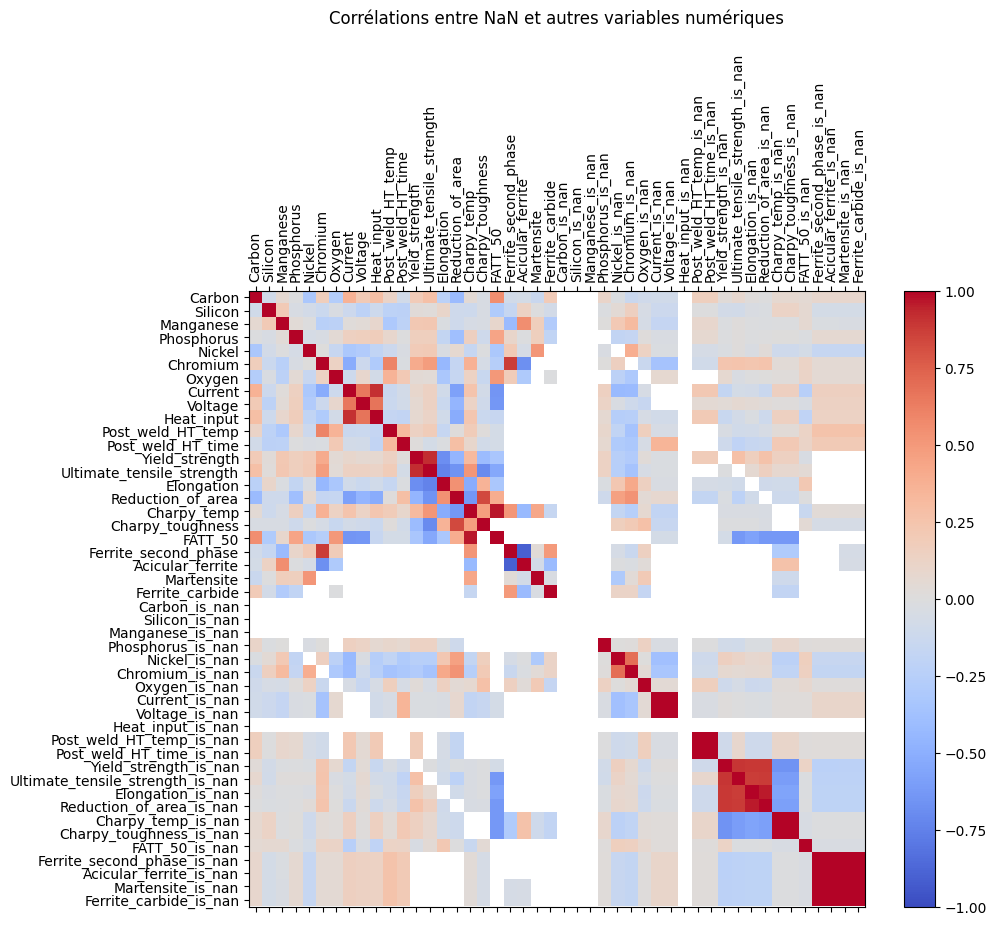

In [171]:
import numpy as np

# Copie de sécurité pour éviter de modifier df_num
df_test_nan = df_num.copy()

# Création de colonnes indicatrices de NaN
for col in df_test_nan.columns:
    df_test_nan[f"{col}_is_nan"] = df_test_nan[col].isna().astype(int)

# Matrice de corrélation
corr_matrix = df_test_nan.corr()

# Affichage avec matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
fig.colorbar(cax)
plt.title("Corrélations entre NaN et autres variables numériques", pad=20)
plt.show()


Permet de vérifier la corrélation des valeurs NaN et quels valeurs sont des MAR. 
On voit que sont corrélés :
- Voltage_is_nan et current_is_nan 
- Post_weld_HT_temp_is_nan et Post_weld_HT_time_is_nan
- Yield_strength_is_nan, Ultimate_tensile_is_nan, Elongation_is_nan et Reduction_of_area_is_nan 
- Charpy_temp_is_nan et Charpy_toughness_is_nan
- Ferrite_second_phase_is_nan, Acicular_ferrite_is_nan, Martensite_is_nan et Ferrite_carbide_is_nan  

Ces corrélations sont dues au fait que certaines mesures sont réalisées ensemble dans le même protocole d'essai. Si un des tests n'est donc pas fait, toutes les variables associées sont manquantes. Ces valeurs sont des MAR, leur absence est due au fait que le test ait été réalisé ou non.

Les autres variables _is_nan non corrélées sont des MCAR. 

Pour pre-processing: 
- Current et Voltage -> on a vu au dessus que peu de Nan -> imputation via médiane
- Essais mécaniques pas d'imputation car ce sont nos potentiels variables cibles 
- Données sur la structure -> trop peu de données pour faire une imputation, on supprime 

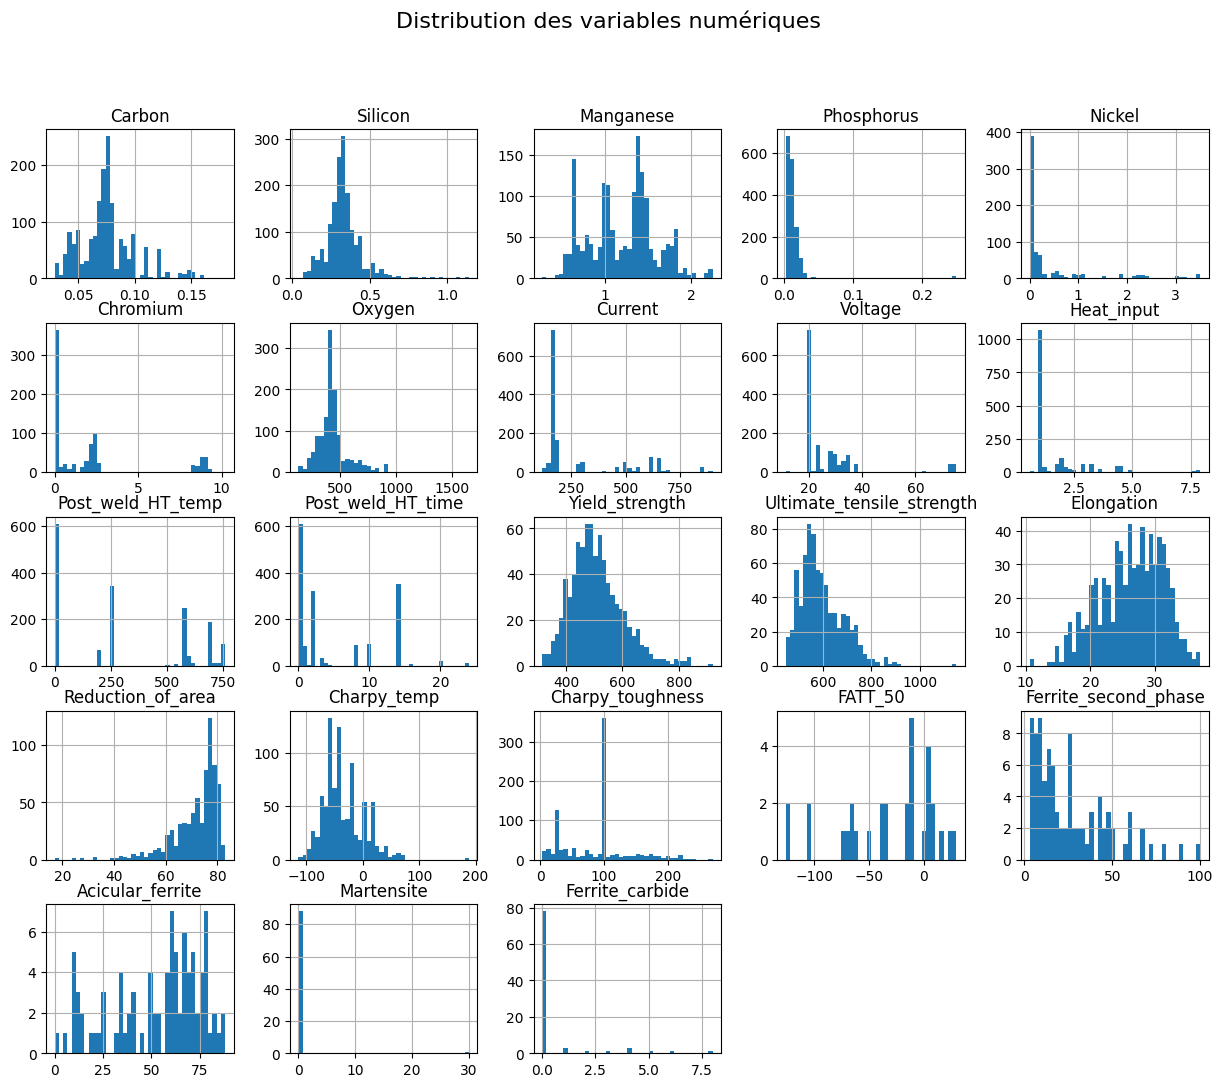

In [172]:
import matplotlib.pyplot as plt
import math

# Histogrammes pour visualiser les distributions
df_num.hist(figsize=(15, 12), bins=40)
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()


**Analyse des histogrammes**

- **Distributions asymétriques** : Phosphorus, Heat_input ->transformations sqrt ou lgo-normale
- **Distribution multimodales** : 
    - Nickel : beaucoup de valeurs =0 et de valeurs nulles (vu dans statitiques descriptives), l'ajout de Ni permet d'améliorer la tenacité mais est couteux -> supression ou on crée une variable catégorielle
    - Chrome : améliore la resistance à la corrosion et la dureté mais coûteux. Même cas que le Nickel ->supression ou on crée une variable catégorielle 
    - Current : plusieurs modes visibles correspondant à différents modes de soudage -> catégorisation
    - Voltage : plusieurs modes également-> catégorisation
    - Post_Weld_HT_time -> variable binaire (Oh ou pas 0h) ou en catégorie
    - Charpy_toughness : distribution bimodale 
- **Distributions catégorielles déguisées** : Post_weld_HT_Temp (protocoles normalisés) -> à mettre en catégorie 

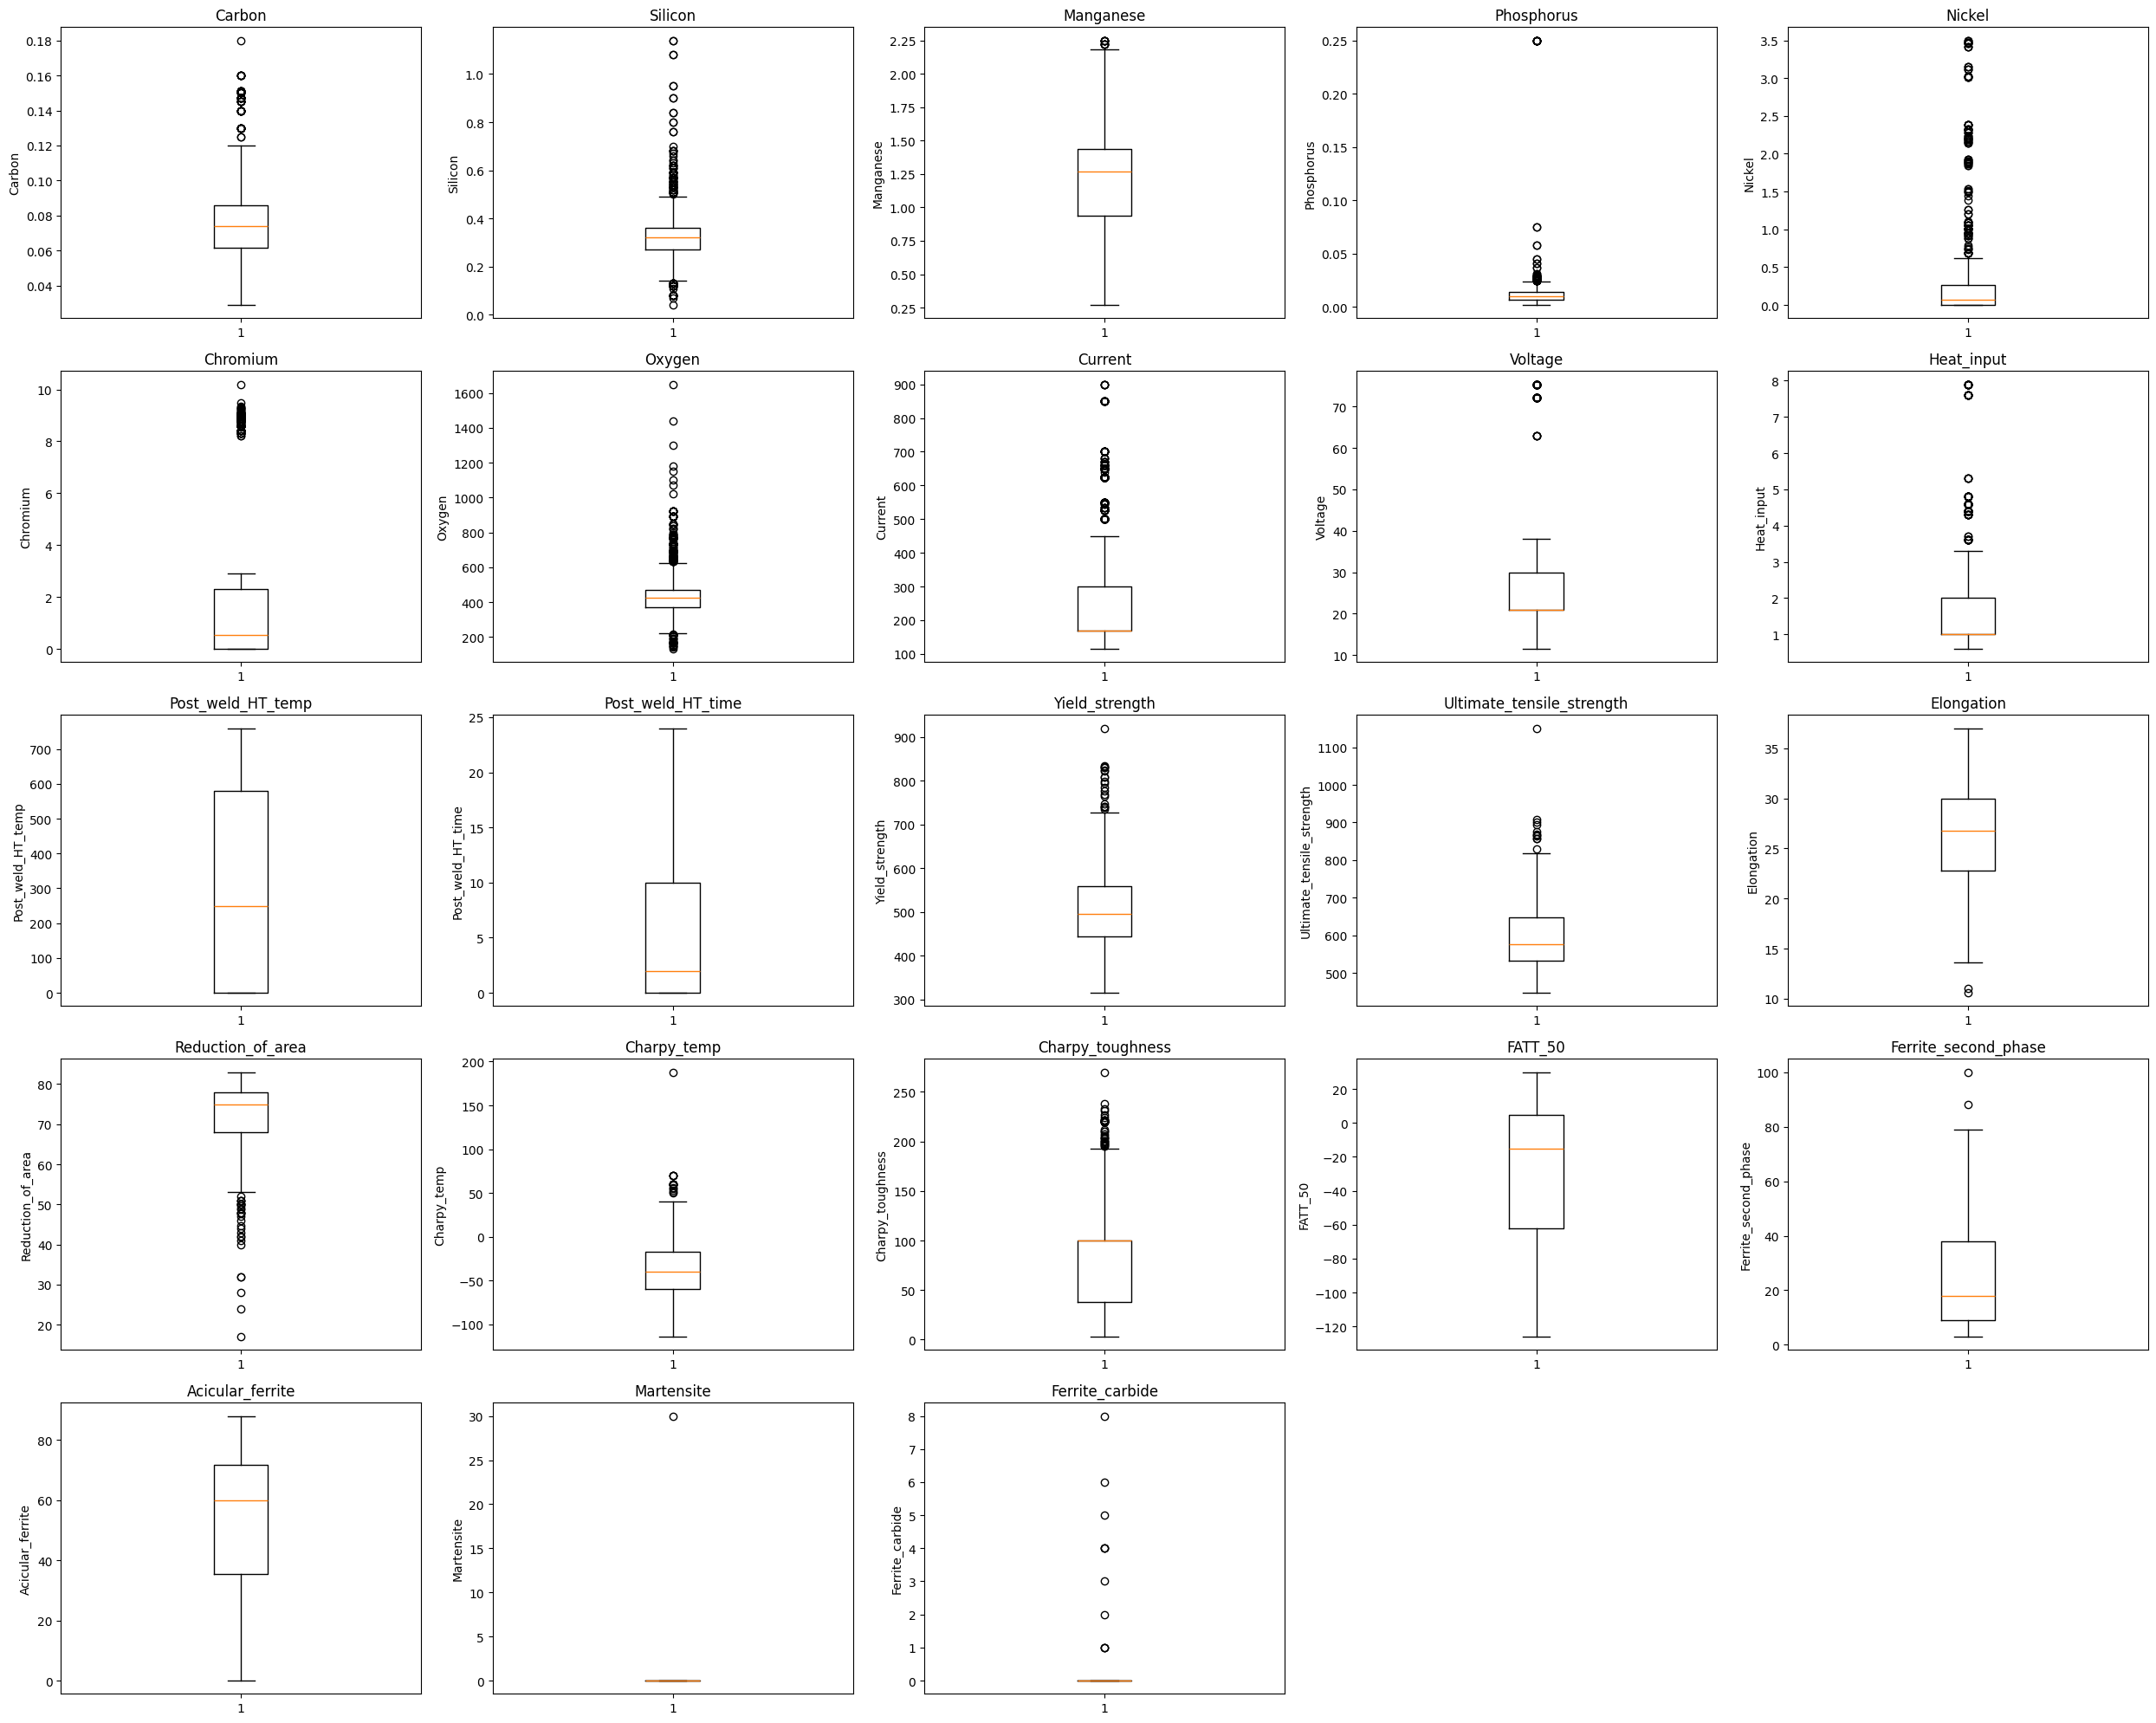

In [173]:
# Boxplots pour repérer les outliers
num_cols = df_num.columns
n_cols = 5  # nbre colonnes par ligne
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))  # l*h

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1) 
    plt.boxplot(df_num[col].dropna())
    plt.title(col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Analyse des boxplots**

- Variables explicatives avec outliers  : Silicon, Nickel, Chromium, Oxygen, Current, Heat_input peuvent être dues:
    - à une distributions asymétriques (Silicon, Phosphorus, Heat_Input)-> transformation (log par ex) puis winsorization à 99%
    - à la nécessité de les mettre en catégorie (Nickel,Chromium)
    - au mode et qualité de soudage -> catégorisation ou RobustScaler pour Current, Robustscaler pour Oxygen  

- Variables mécaniques, variables cibles : outliers à conserver (vraies variations matériaux). Peut-être scaler lorsqu'on utilise des modèles linéaires 

- Martensite, Ferrite_carbide : boxplots vides confirment inutilité 

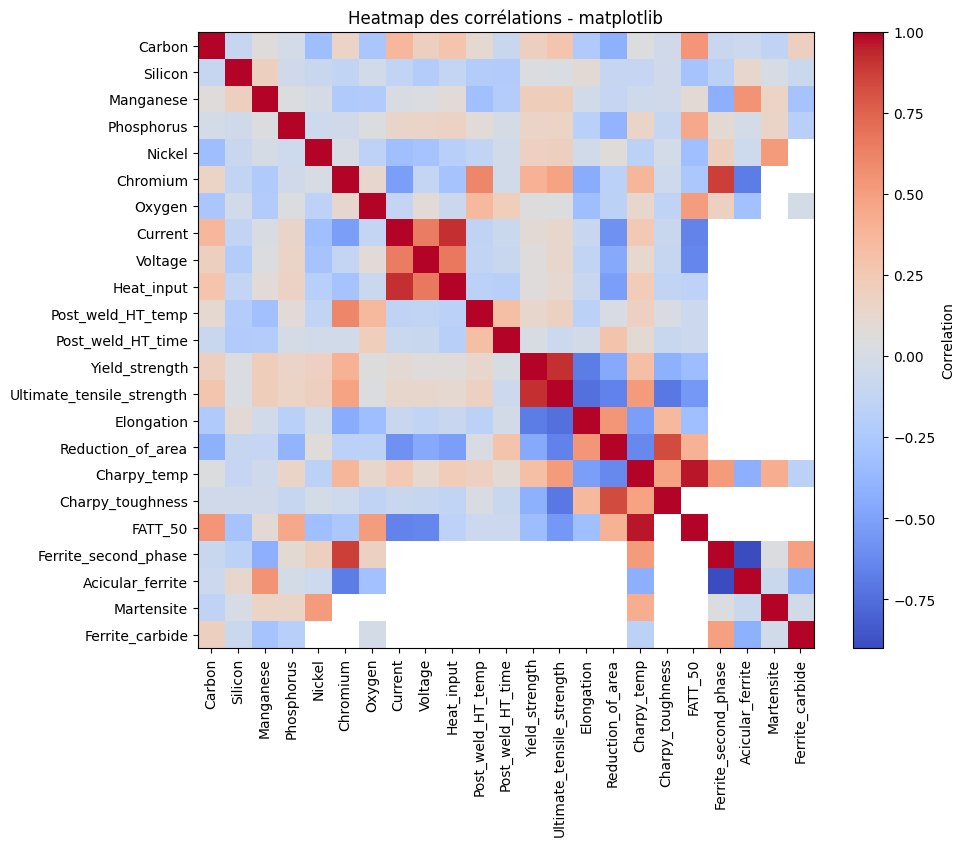

In [174]:
import matplotlib.pyplot as plt
import numpy as np

corr = df_num.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title("Heatmap des corrélations - matplotlib")
plt.show()


**Analyses de la heatmap**

Correlations entre :  
- Current/Voltage -> créer Power et supprimer les deux ?  
- Yield/Ultimate -> supprmier l'un des deux   
- Elongation/Réduction -> supprmier l'un des deux  
- Heat_input corrélé avec Current/Voltage -> logique via effet Joule   
- Charpy_temp/Charpy_toughness : corrélation modérée attendue 


##### **3. Analyse des colonnes purement textuelles**

--- AC_or_DC ---
AC_or_DC
DC     1395
NaN     215
AC       42
Name: count, dtype: int64


--- Weld_type ---
Weld_type
MMA      1140
SA        261
FCA        87
TSA        87
ShMA       40
NGSAW      18
NGGMA       7
SAA         4
GTAA        4
GMAA        4
Name: count, dtype: int64


--- Weld_ID ---
Weld_ID
Pat-1981-S6/BX400                      5
Pat-1981-S4/BX200                      5
Pat-1981-S2Mo/BX400                    5
Pat-1981-S4/BX400                      5
Pat-1981-WB3/BX400                     5
                                      ..
Evans-StressRelief-1991-0.145Ach-40    1
Evans-StressRelief-1991-0.145Ach-50    1
Evans-StressRelief-1991-0.145Ach-60    1
Evans-StressRelief-1991-0.145A         1
Birmingham-MAX39                       1
Name: count, Length: 1490, dtype: int64




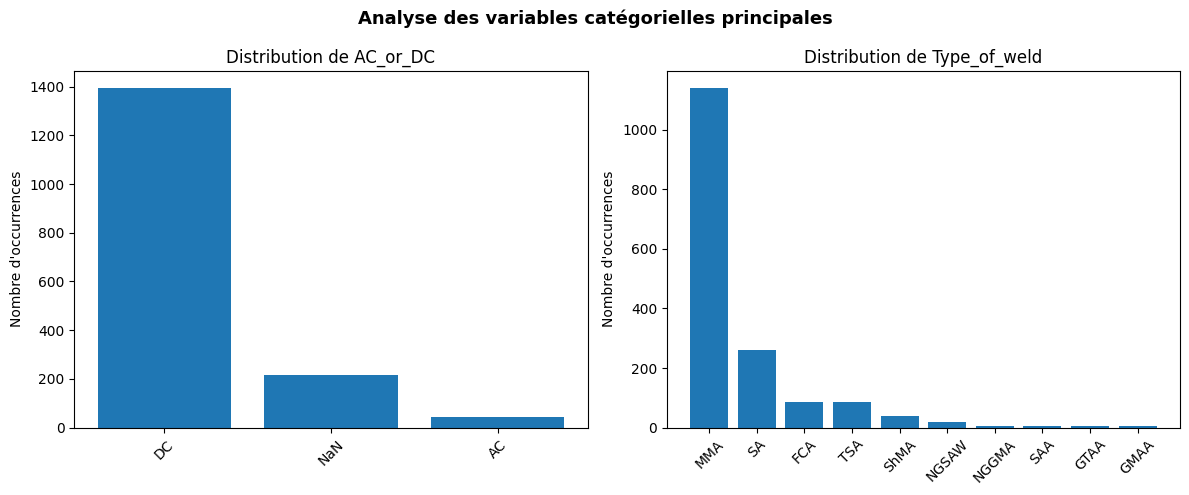

In [175]:
#Analyse des différentes catégories dans les colonnes textuelles 

for col in text_cols:
    print(f"--- {col} ---")
    print(df_transfo[col].value_counts(dropna=False))  # compte toutes les modalités, NaN inclus
    print("\n")


import matplotlib.pyplot as plt

acdc_count=df_transfo['AC_or_DC'].fillna("NaN").value_counts()
weld_counts=df_transfo['Weld_type'].value_counts()

fig, axes=plt.subplots(1,2, figsize=(12,5))

axes[0].bar(acdc_count.index, acdc_count.values)
axes[0].set_title("Distribution de AC_or_DC")
axes[0].set_ylabel("Nombre d'occurrences")
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(weld_counts.index, weld_counts.values)
axes[1].set_title("Distribution de Type_of_weld")
axes[1].set_ylabel("Nombre d'occurrences")
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle("Analyse des variables catégorielles principales", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()


**Analyse des variables catégorielles**

AC_or_DC :
  - La majorité des observations sont en courant continu (DC).
  - Environ 13 % de valeurs manquantes à imputer ou à conserver comme catégorie “Unknown”.
  - -> encodage binaire  

Weld_type :
  - La catégorie MMA domine très largement.
  - Pas de valeurs manquantes.
  - -> encodage one-hot 

Weld_id :
  - ce sont des id donc sont uniques

##### **4. Analyse des colonnes mixtes**

Les 18 colonnes mixtes posent problème car elles contiennent à la fois des valeurs numériques (float) et textuelles.
Afin de mieux comprendre la nature de ces données, nous affichons pour chacune :
- le nombre de valeurs convertibles en float ainsi qu'un aperçu statitique pour avoir un ordre de grandeur
- le nombre de valeurs manquantes (NaN) afin d'évaluer s'il est pertinent de supprimer certains variables
- le nombre et le type de valeurs non convertibles en float afin de déterminer une stratégie de nettoyage/conversion adaptée

In [176]:
from collections import Counter

for col in mixed_cols:
    float_values = []
    count_nan = 0
    special_values = []

    for val in df_transfo[col]:
        if pd.isna(val):
            count_nan += 1
        else:
            try:
                float_values.append(float(val))
            except:
                special_values.append(val)

    # Comptage des valeurs spéciales
    special_counts = Counter(special_values)
    
    # Proportion de valeurs spéciales par rapport aux valeurs float (sans compter les NaN)
    total_valid = len(float_values) + len(special_values)
    if total_valid > 0:
        proportion_special = len(special_values) / total_valid
    else:
        proportion_special = np.nan  # éviter division par zéro

    print(f"\n Colonne : {col}")
    print(f"  Valeurs convertibles en float : {len(float_values)}")
    
    if float_values:
        print(f"    Moyenne des valeurs float : {np.mean(float_values):.3f}")
        print(f"    Min : {min(float_values):.3f} | Max : {max(float_values):.3f}")

    print(f"  Valeurs NaN : {count_nan} et pourcentage NaN : {count_nan/(count_nan+total_valid):.2%}")
    print(f"  Valeurs spéciales : {len(special_values)}")
    print(f"  Proportion de valeurs spéciales (parmi les non-NaN) : {proportion_special:.2%}")

    if special_values:
        print("    Détail des valeurs spéciales :")
        for v, c in special_counts.items():
            print(f"      - {v!r} : {c} fois")



 Colonne : Sulphur
  Valeurs convertibles en float : 1641
    Moyenne des valeurs float : 0.010
    Min : 0.001 | Max : 0.140
  Valeurs NaN : 4 et pourcentage NaN : 0.24%
  Valeurs spéciales : 7
  Proportion de valeurs spéciales (parmi les non-NaN) : 0.42%
    Détail des valeurs spéciales :
      - '<0.002' : 7 fois

 Colonne : Molybdenum
  Valeurs convertibles en float : 791
    Moyenne des valeurs float : 0.480
    Min : 0.000 | Max : 1.500
  Valeurs NaN : 859 et pourcentage NaN : 52.00%
  Valeurs spéciales : 2
  Proportion de valeurs spéciales (parmi les non-NaN) : 0.25%
    Détail des valeurs spéciales :
      - '<0.01' : 2 fois

 Colonne : Vanadium
  Valeurs convertibles en float : 620
    Moyenne des valeurs float : 0.072
    Min : 0.000 | Max : 0.320
  Valeurs NaN : 724 et pourcentage NaN : 43.83%
  Valeurs spéciales : 308
  Proportion de valeurs spéciales (parmi les non-NaN) : 33.19%
    Détail des valeurs spéciales :
      - '<0.0005' : 266 fois
      - '<0.01' : 31 fois
    

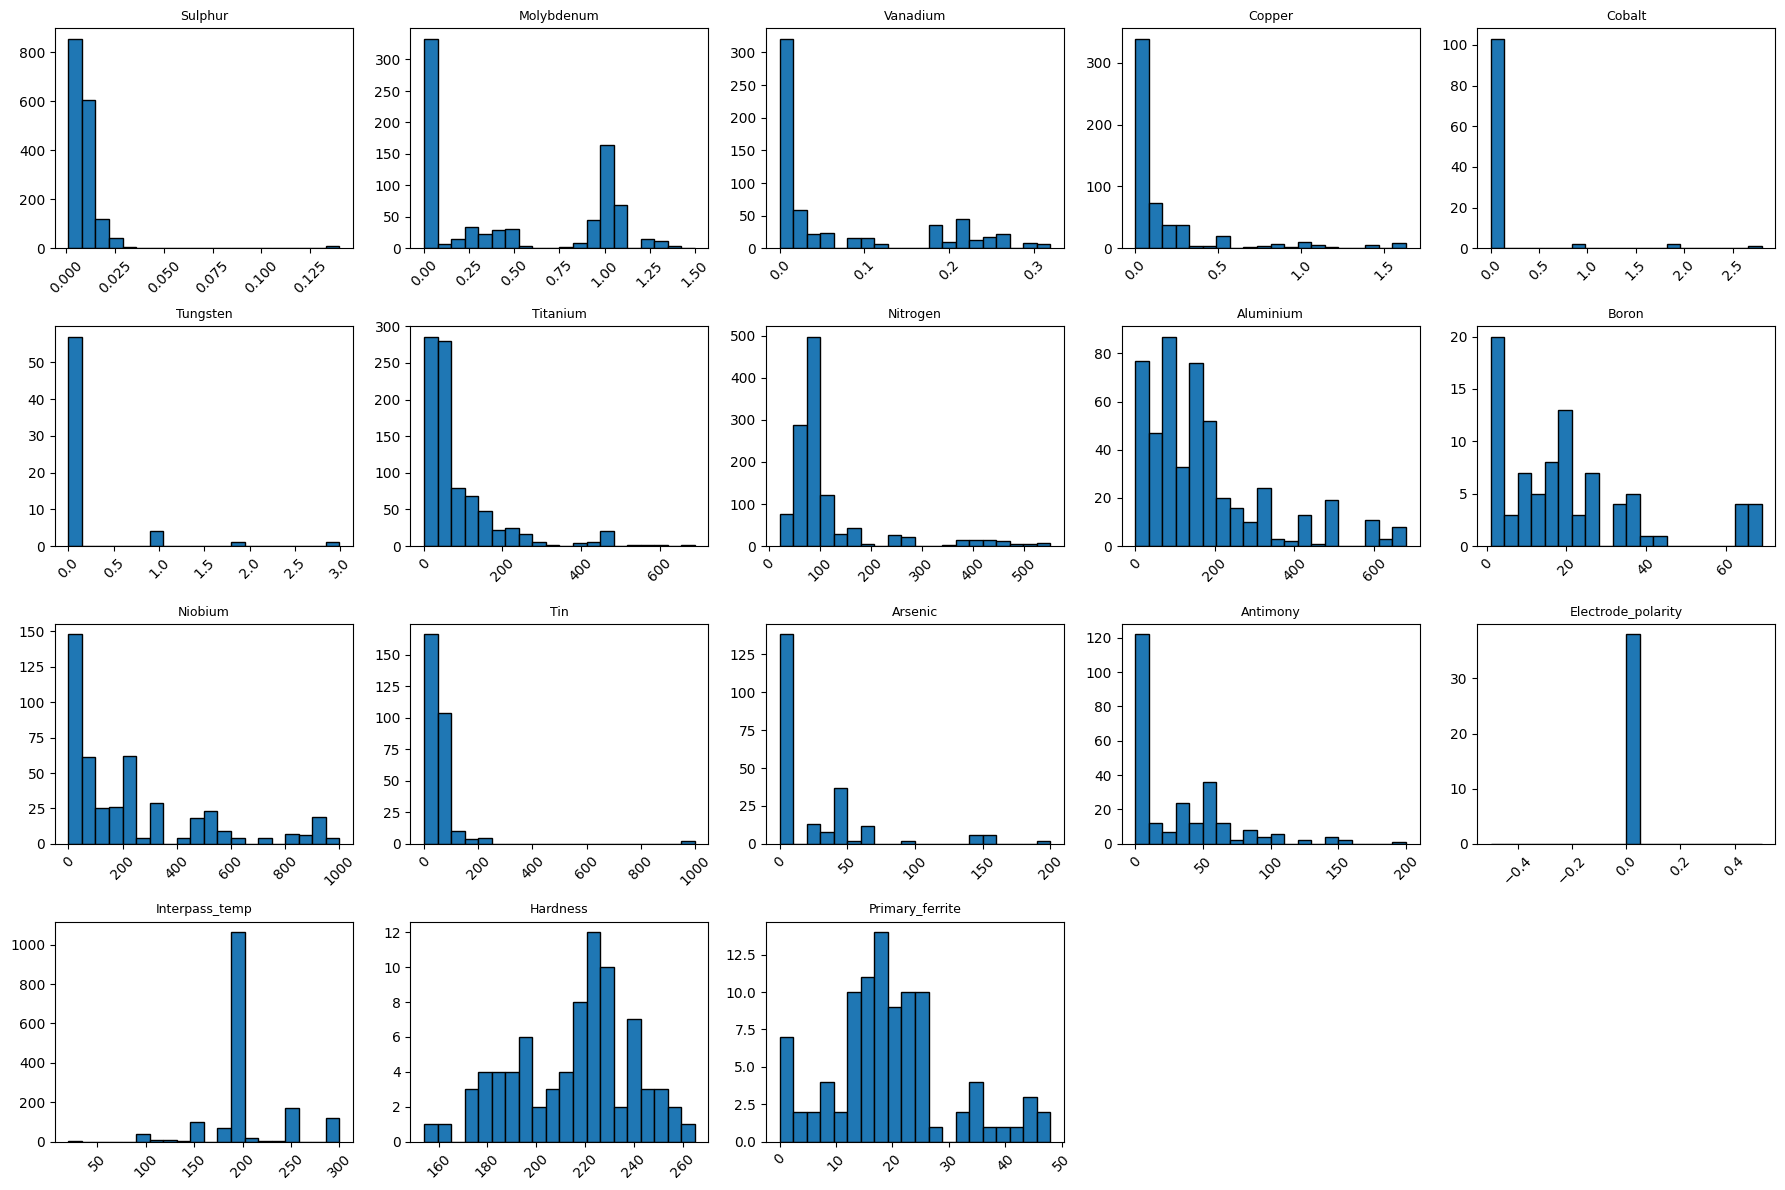

In [177]:
cols_with_floats = []
data_to_plot = []

# Préparer les données float
for col in mixed_cols:
    numeric_vals = []
    for val in df_transfo[col]:
        try:
            numeric_vals.append(float(val))
        except:
            pass
    numeric_vals = [v for v in numeric_vals if not pd.isna(v)]
    if len(numeric_vals) >= 2:
        cols_with_floats.append(col)
        data_to_plot.append(numeric_vals)

# Organisation 5 histogrammes par ligne
n_cols = 5
n_rows = math.ceil(len(cols_with_floats) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_with_floats):
    axes[i].hist(data_to_plot[i], bins=20, edgecolor='black')
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis='x', rotation=45)

# Masquer les axes vides
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


**Analyse des colonnes mixtes (float + texte)**

Certaines colonnes contiennent à la fois des valeurs numériques, des valeurs textuelles (ex. <0.01, intervalles, annotations HV) et des valeurs manquantes (NaN).  

Stratégie de pré-processing que l'on va adopter en fonction des colonnes :
- Hardness : supprimer les suffixes HVx pour ne conserver que la valeur numérique, puis convertir en float  
- Colonnes avec valeurs spéciales de type <x -> remplacement par x/2 (approximation du seuil), puis convertir en float    
- Colonnes avec beaucoup de valeurs manquantes -> imputer ou supprimer si trop de NaN  
- Colonnes quasi-textuelles / indicatives (`Electrode_polarity`) : convertir en variable bicatégorielle  
- Colonnes avec intervalles ( `Interpass_temp`) : remplacer par la moyenne de l’intervalle  




### II. Pre processing

**Suppression des colonnes inutilisables**

On supprime :
- la colonne ID, inutile pour l'entrainement 
- les métaux avec plus de 80% de NaN (pas assez d'infos exploitables)
- la colonne Copper qui a 65% de NaN et qui est peu utilisé en soudure 
- les variables microstrucuturales qui ont plus de 90% de NaN (les mesures microstructurales sont apparemment coûteuses donc rarement effectuées ce qui explique le peu d'informations exploitables)

In [178]:
columns_to_drop_id=['Weld_ID']
columns_to_drop_metals_high_nan=['Copper','Cobalt','Tungsten','Boron','Tin','Arsenic','Antimony','Primary_ferrite']
columns_to_drop_microstructure=['FATT_50','Ferrite_second_phase','Acicular_ferrite','Martensite','Ferrite_carbide']

all_columns_to_drop=(columns_to_drop_id+columns_to_drop_metals_high_nan+columns_to_drop_microstructure)

df_preprocessing=df_transfo.copy()
print(f"Shape avant suppression colonnes inutiles : {df_preprocessing.shape}")

all_columns_to_drop = [col for col in all_columns_to_drop if col in df_preprocessing.columns]
df_preprocessing.drop(columns=all_columns_to_drop, inplace=True)
print(f"Shape après suppression colonnes inutiles : {df_preprocessing.shape}")
print(f"Colonnes supprimées : {len(all_columns_to_drop)}")


Shape avant suppression colonnes inutiles : (1652, 44)
Shape après suppression colonnes inutiles : (1652, 30)
Colonnes supprimées : 14


**Modifications des colonnes mixtes**

On va appliquer ces transformations :
- les valeurs <x par x/2 (approximation du seuil)
- pour Nitrogen, transformation de XXtotYYres en XX ()
- pour Interpass_temp, on remplace les intervalles par la moyenne
- pour Hardness, on enlève les 'Hv10', 'Hv30' etc 

In [181]:
# Modification <x en x/2
def modif_lod(value):
    """Modification valeurs type '<X' en X/2"""
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # Cas '<X'
    if value_str.startswith('<'):
        try:
            lod_value = float(value_str[1:])
            return lod_value / 2
        except:
            return np.nan
    
    # Cas normal (déjà un nombre)
    try:
        return float(value)
    except:
        return np.nan

#On applique notre fonction aux colonnes concernées 
lod_columns = [
    'Sulphur', 'Molybdenum', 'Vanadium', 'Titanium', 
    'Aluminium', 'Niobium'
]

for col in lod_columns:
    if col in df_preprocessing.columns:
        df_preprocessing[col] = df_preprocessing[col].apply(modif_lod)
        print(f"{col} : valeurs LOD modifiées")



# Modification Nitrogen pour les formats

import re

def modif_nitrogen(value):
    """Extrait le premier nombre de formats type '67tot33res'"""
    if pd.isna(value):
        return np.nan
    
    value_str = str(value)
    
    # Chercher le premier nombre
    match = re.match(r'(\d+)', value_str)
    if match:
        return float(match.group(1))
    
    # Sinon conversion directe
    try:
        return float(value)
    except:
        return np.nan

if 'Nitrogen' in df_preprocessing.columns:
    df_preprocessing['Nitrogen'] = df_preprocessing['Nitrogen'].apply(modif_nitrogen)
    print("Nitrogen : valeurs modifiées")



# Modification de Interpass_temp pour les intervalles '150-200'

def modif_interval(value):
    """Modification des intervalles type '150-200' en moyenne"""
    if pd.isna(value):
        return np.nan
    
    value_str = str(value)
    
    # Si contient '-' et c'est un intervalle (pas un négatif)
    if '-' in value_str and not value_str.startswith('-'):
        parts = value_str.split('-')
        if len(parts) == 2:
            try:
                low, high = float(parts[0]), float(parts[1])
                return (low + high) / 2
            except:
                pass
    
    # Sinon, nombre normal
    try:
        return float(value)
    except:
        return np.nan


if 'Interpass_temp' in df_preprocessing.columns:
    df_preprocessing['Interpass_temp'] = df_preprocessing['Interpass_temp'].apply(modif_interval)
    print("Interpass_temp : intervalles modifiés")


# Modification de Hardness (enlever 'Hv10', 'Hv30'...)

def modif_hardness(value):
    """Extrait la valeur numérique, ignore Hv10/Hv30/Hv5"""
    if pd.isna(value):
        return np.nan
    
    value_str = str(value)
    
    # Format '203(Hv30)' ou '203Hv30'
    match = re.search(r'(\d+)(?:\()?Hv\d+', value_str)
    if match:
        return float(match.group(1))
    
    # Déjà un nombre
    try:
        return float(value)
    except:
        return np.nan

if 'Hardness' in df_preprocessing.columns:
    df_preprocessing['Hardness'] = df_preprocessing['Hardness'].apply(modif_hardness)
    print("Hardness : valeurs modifiées")



# Convertion en colonnes numériques

for col in df_preprocessing.columns:
    df_preprocessing[col] = pd.to_numeric(df_preprocessing[col], errors='ignore')

print("\n")
print("On vérifie que nos variables sont désormais bien catégorisées en float : ")
print(df_preprocessing.info())


Sulphur : valeurs LOD modifiées
Molybdenum : valeurs LOD modifiées
Vanadium : valeurs LOD modifiées
Titanium : valeurs LOD modifiées
Aluminium : valeurs LOD modifiées
Niobium : valeurs LOD modifiées
Nitrogen : valeurs modifiées
Interpass_temp : intervalles modifiés
Hardness : valeurs modifiées


On vérifie que nos variables sont désormais bien catégorisées en float : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Carbon                     1652 non-null   float64
 1   Silicon                    1652 non-null   float64
 2   Manganese                  1652 non-null   float64
 3   Sulphur                    1648 non-null   float64
 4   Phosphorus                 1642 non-null   float64
 5   Nickel                     697 non-null    float64
 6   Chromium                   784 non-null    float64
 7   Molybdenum   

**Prise de décision sur les éléments d'alliage intentionnels**

On prend la décision de mettre les valeurs

In [ ]:
# Éléments d'alliage intentionnels (NaN = non ajouté = 0)
alloy_elements = [
    'Nickel', 'Chromium', 'Molybdenum', 'Vanadium', 
    'Niobium', 'Titanium'
]

for col in alloy_elements:
    if col in df.columns:
        nan_count_before = df[col].isna().sum()
        df[col] = df[col].fillna(0)
        print(f"{col} : {nan_count_before} NaN → 0")

#Aluminium (cas spécial : trace résiduelle)
if 'Aluminium' in df.columns:
    # Les NaN → 2.5 ppm (trace résiduelle typique)
    nan_count = df['Aluminium'].isna().sum()
    df['Aluminium'] = df['Aluminium'].fillna(2.5)
    print(f"Aluminium : {nan_count} NaN → 2.5 ppm (trace)")

print(f"\nNaN restants par colonne (éléments) :")
print(df[alloy_elements + ['Aluminium']].isna().sum())

**Decision de la target**

On choisit de prendre pour Target la variable Yield_strenght 

**Split entre Train/Test (avant les imputations)**

**Imputation des valeurs manquantes**

Si les valeurs manquantes: 
- sont <5%, on utilise imputation simple via médiane
- sont entre 5% et 25%, on utilise une imputation plus complexe via knn

**Création de nouvelles variables/Feature Engineering** 

**Transformation des distributions asymétriques**

**Gestion des outliers**

On va utiliser winsorization

**Catégorisation et encodage**

**Standardisation des variables**

Via standardscaler ou RobustScaler lorsqu'il y a des outliers que l'on souhaite garder 

**Gestion de la multicolinéarité et sélection de features**

Lorsque deux variables sont frotement corrélées, on en garde 1/2.

On fait une PCA pour analyse des dimension

**Verification du pre-processing**